In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import rcParams
rcParams['font.family']='STHeiti'

In [7]:
#导入数据
columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_table('/Users/happy/Desktop/data/CDNOW_master.txt',names=columns,sep='\s+') #sep='\s+':匹配任意个空格
df.head()
#1、日期格式需要转换
#2、存在一个用户一天多次购买行为

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/yd/2b4g299n5jnbqhms42xzdmgc0000gn/T/ipykernel_1700/343373574.py:3: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_table('/Users/happy/Desktop/data/CDNOW_master.txt',names=columns,sep='\s+') #sep='\s+':匹配任意个空格


,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [8]:
df.describe()
#1、用户平均购买2-3个商品，标准差2，3，稍微有点波动，属于正常。75%分位数的时候，说明绝大多数订单量在2-3个产品左右
#2、购买金额，大部分订单消费金额集中在30-45


,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [37]:
df.info()
#没有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   月份              69659 non-null  int64         
 6   month           69659 non-null  datetime64[s] 
dtypes: datetime64[ns](1), datetime64[s](1), float64(1), int64(4)
memory usage: 3.7 MB


In [23]:
#数据预处理
df['order_date']=pd.to_datetime(df['order_dt'],format='%Y%m%d')
df['month']=df['order_date'].values.astype('datetime64[M]') #将order—date转为精读为月份的列 datetime64[M]：控制转换的精度 
df.head()

,user_id,order_dt,order_products,order_amount,order_date,月份,month
0,1,19970101,1,11.77,1997-01-01,1,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1,1997-01-01
4,3,19970330,2,20.76,1997-03-30,3,1997-03-01


Text(0.5, 1.0, '每月的消费人数')

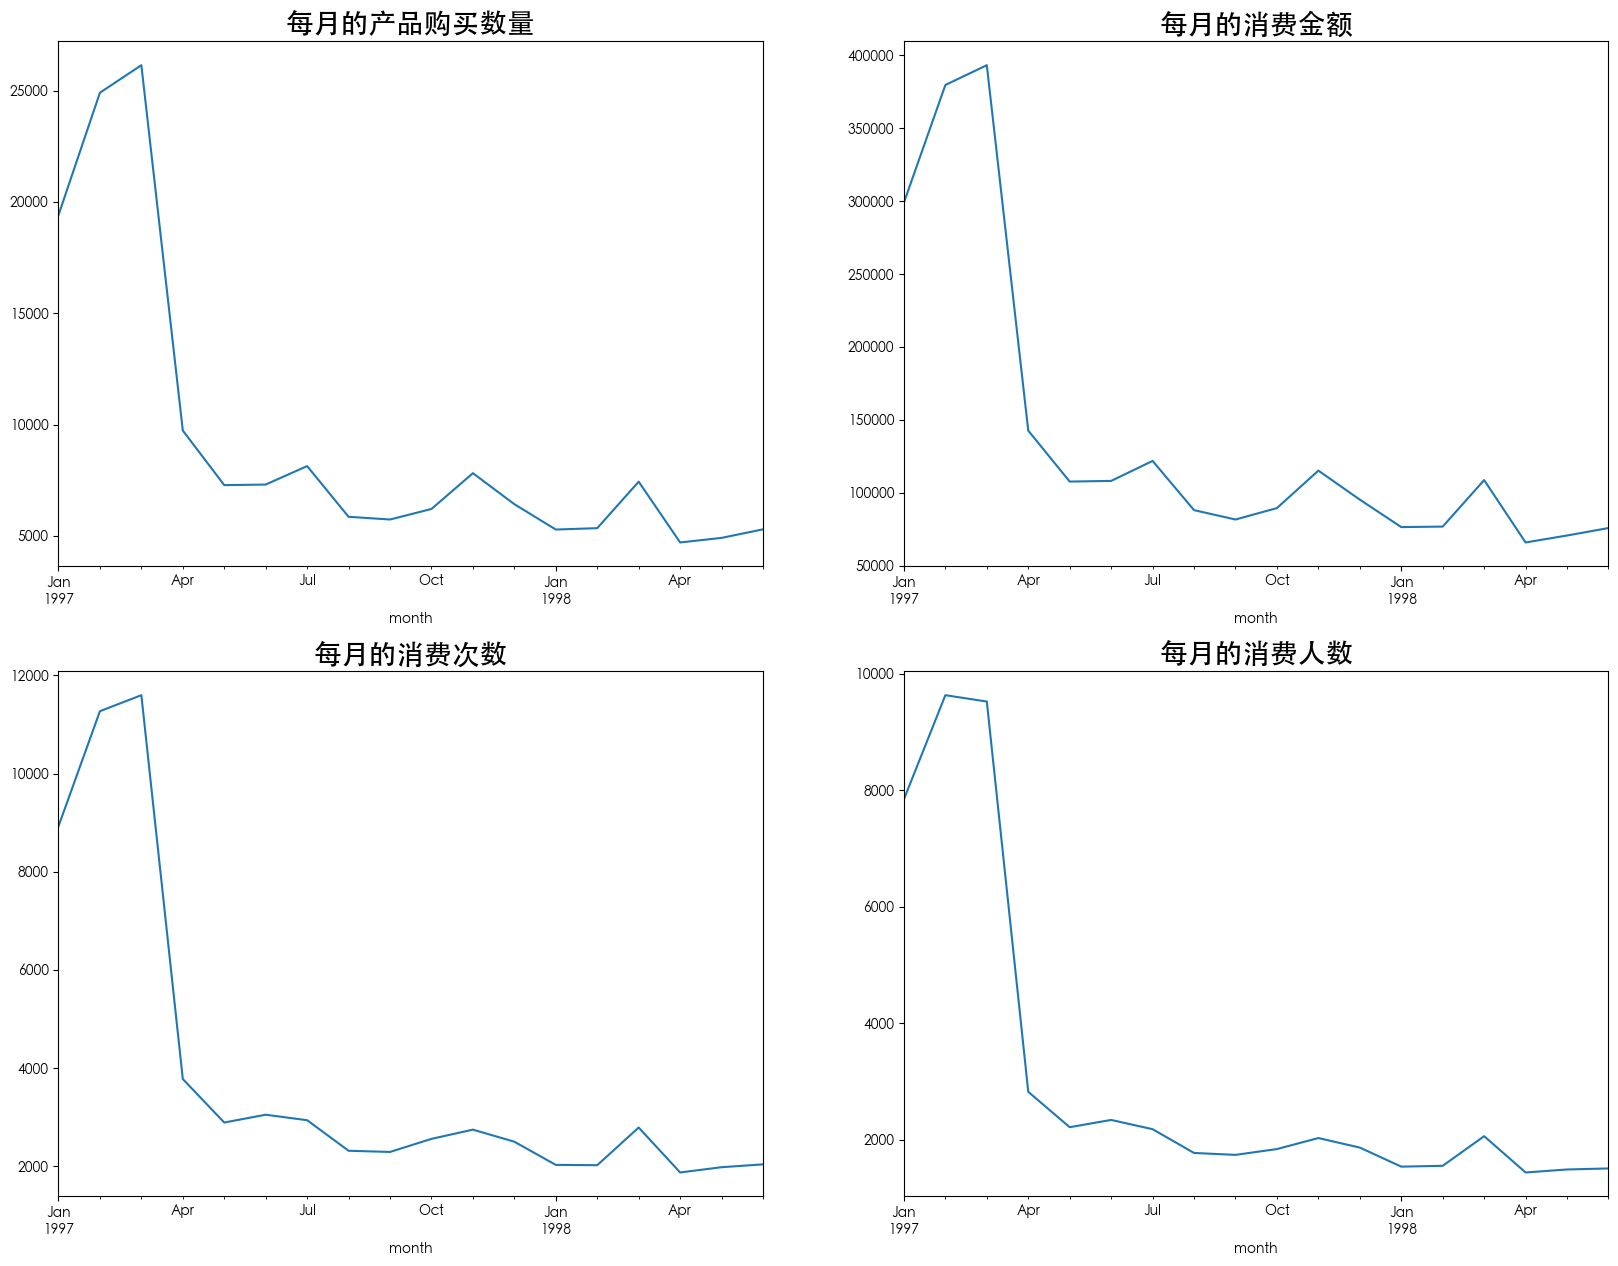

In [35]:
##用户整体消费趋势分析（按月份）
#按月份统计产品购买数量，消费金额，消费次数，消费人数
plt.figure(figsize=(20,15))
#每月的产品购买数量
plt.subplot(221)
df.groupby(by='month')['order_products'].sum().plot() #默认是折线图
plt.title('每月的产品购买数量',fontsize=20)
#每月的消费金额
plt.subplot(222)
df.groupby(by='month')['order_amount'].sum().plot() #默认是折线图
plt.title('每月的消费金额',fontsize=20)
#每月的消费次数
plt.subplot(223)
df.groupby(by='month')['user_id'].count().plot() #默认是折线图
plt.title('每月的消费次数',fontsize=20)
#每月的消费人数
plt.subplot(224)
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()#默认是折线图
#分析结果：
#图一可以看出来，前三个月销量非常高，而以后销量较为稳定，并且稍微呈现下降趋势
#图二可以看出，依然前三个月消费金额较高，与消费数量成正相关关系，三月份过后下降严重，并稍微呈现下降趋势，思考原因？1:跟月份有关，在我国1，2，3月处于春节前后。2:公司在1，2，3月份是否加大营销力度
#图三可以看出。前三个月订单数在10000左右，后续平均消费单数在2500左右
#图四可以看出，前三个月消费人数在8000-10000左右，后续平均消费在2000不到的样子
#总结：所有数据显示，前三个月消费事态异常

In [41]:
##用户个体消费分析
#1、用户消费金额， 消费次数（产品数量）描述统计
user_grouped=df.groupby(by='user_id')[['order_dt','order_products','order_amount']].sum()
print(user_grouped.describe())
print('用户数量：',len(user_grouped))
#

           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
用户数量： 23570
